<a href="https://colab.research.google.com/github/Pratick9/Ensemble-Learning/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **Random Forest** - It is like Binary Decision Tree ....Feature are extracted using CNN ,using that features the prediction is made and average of the predictions are taken as the final prediction 

> **K-Nearest Neighbour** - Data are drawn in x and y -axis ,the unknown point(the point you want to predict) is taken and the distance of all the nearest neighbouring points is calculated and the nearest group is predicted 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.models import Sequential             #the Sequential module which is used for initializing our model.
from keras.layers import Convolution2D as c2d   #we’ll use for the first step of making the CNN that is the convolution step in which we add convolutional layers.
from keras.layers import MaxPooling2D           #the pooling step that will add our pooling layers .
from keras.layers import Flatten                #flattening
from keras.layers import Dense                  #this is the package we use to add the fully connected layer.
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import datasets
from sklearn.model_selection import train_test_split
from tqdm import tqdm #progresss bar 
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import os 
import shutil
import pandas as pd

# ***Image processing and Data spliting***

In [ ]:
# def train_test_split():
#     print("########### Train Test Val Script started ###########")
#     data_csv = pd.read_csv("/content/drive/MyDrive/Fish Dataset/class_id.csv") ##Use if you have classes saved in any .csv file

#     root_dir = '/content/drive/MyDrive/Fish New Sp Dataset'
#     classes_dir = ['fish_01', 'fish_02','fish_03','fish_04','fish_05','fish_06','fish_07','fish_08','fish_09','fish_10','fish_11','fish_12','fish_13','fish_14','fish_15','fish_16','fish_17','fish_18','fish_19','fish_20','fish_21','fish_22','fish_23']

#     #for name in data_csv['file_name'].unique()[:10]:
#     #     classes_dir.append(name)

#     processed_dir = '/content/drive/MyDrive/Fish Dataset'

#     val_ratio = 0.20
#     test_ratio = 0.20
#     os.makedirs(root_dir + '/train//')
#     os.makedirs(root_dir + '/val//')
#     os.makedirs(root_dir + '/test//')
#     for cls in classes_dir:
#         # Creating partitions of the data after shuffeling
#         print("$$$$$$$ Class Name " + cls + " $$$$$$$")
#         src = processed_dir +"/" + cls  # Folder to copy images from

#         allFileNames = os.listdir(src)
#         print(allFileNames)
#         np.random.shuffle(allFileNames)
#         train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                                   [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
#                                                                    int(len(allFileNames) * (1 - val_ratio)),
#                                                                    ])
#         # filne=[]
#         # filena=[filne.append(name[5:-4])for name in train_FileNames]
#         train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
#         val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
#         test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]
#         print('Total images: '+ str(len(allFileNames)))
#         print('Training: '+ str(len(train_FileNames)))
#         print('Validation: '+  str(len(val_FileNames)))
#         print('Testing: '+ str(len(test_FileNames)))

#         # # Creating Train / Val / Test folders (One time use)
        

#         # Copy-pasting images
#         for name in train_FileNames:
#             shutil.copy(name, root_dir + '/train/')# + cls)

#         for name in val_FileNames:
#             shutil.copy(name, root_dir + '/val/')# + cls)

#         for name in test_FileNames:
#             shutil.copy(name, root_dir + '/test/')# + cls)

#     print("########### Train Test Val Script Ended ###########")

# train_test_split()

In [ ]:
# src='/content/drive/MyDrive/Fish New Sp Dataset/train'
# allFileNames = os.listdir(src) 
# print('Total images: '+ str(len(allFileNames)))


In [ ]:
# processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/train'
# src = processed_dir# +"/" + cls  # Folder to copy images from
# data_csv = pd.read_csv("/content/drive/MyDrive/Fish Dataset/class_id.csv") ##Use if you have classes saved in any .csv file

# allFileNames = os.listdir(src)
# filne=[]
# ctr=-1
# classes_dir = ['file_name', 'cluster_id']
# import csv
# with open('/content/sample_data/train.csv','w', encoding='UTF8', newline='') as f1:
#     #writer.writerow(classes_dir)
#     writer = csv.DictWriter(f1, fieldnames=classes_dir)     
#     writer.writeheader()   
#     # print(data_csv['file_name'])
#     # writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
#     filena=[filne.append(name[6:-4])for name in allFileNames]
#     print(len(filne))
#     for i in data_csv['file_name']:
#       ctr+=1
#       if i in filne :
#         my_dict = {"file_name":'',"cluster_id":''};
#         my_dict["file_name"]=i
#         my_dict["cluster_id"]=data_csv['cluster_id'][ctr]
#         print(my_dict)
#         writer.writerow(my_dict)

In [ ]:
# processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/test'
# src = processed_dir# +"/" + cls  # Folder to copy images from
# data_csv = pd.read_csv("/content/drive/MyDrive/Fish Dataset/class_id.csv") ##Use if you have classes saved in any .csv file

# allFileNames = os.listdir(src)
# filne=[]
# ctr=-1
# classes_dir = ['file_name', 'cluster_id']
# import csv
# with open('/content/sample_data/test.csv','w', encoding='UTF8', newline='') as f1:
#     #writer.writerow(classes_dir)
#     writer = csv.DictWriter(f1, fieldnames=classes_dir)     
#     writer.writeheader()   
#     # print(data_csv['file_name'])
#     # writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
#     filena=[filne.append(name[6:-4])for name in allFileNames]
#     print(len(filne))
#     for i in data_csv['file_name']:
#       ctr+=1
#       if i in filne :
#         my_dict = {"file_name":'',"cluster_id":''};
#         my_dict["file_name"]=i
#         my_dict["cluster_id"]=data_csv['cluster_id'][ctr]
#         print(my_dict)
#         writer.writerow(my_dict)

In [ ]:
# processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/val'
# src = processed_dir# +"/" + cls  # Folder to copy images from
# data_csv = pd.read_csv("/content/drive/MyDrive/Fish Dataset/class_id.csv") ##Use if you have classes saved in any .csv file

# allFileNames = os.listdir(src)
# filne=[]
# ctr=-1
# classes_dir = ['file_name', 'cluster_id']
# import csv
# with open('/content/sample_data/val.csv','w', encoding='UTF8', newline='') as f1:
#     #writer.writerow(classes_dir)
#     writer = csv.DictWriter(f1, fieldnames=classes_dir)     
#     writer.writeheader()   
#     # print(data_csv['file_name'])
#     # writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
#     filena=[filne.append(name[6:-4])for name in allFileNames]
#     print(len(filne))
#     for i in data_csv['file_name']:
#       ctr+=1
#       if i in filne :
#         my_dict = {"file_name":'',"cluster_id":''};
#         my_dict["file_name"]=i
#         my_dict["cluster_id"]=data_csv['cluster_id'][ctr]
#         print(my_dict)
#         writer.writerow(my_dict)

In [ ]:
# print("TO CHECK ANY FILE IS LEFT OVER IN TRAIN")
# processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/train'
# allFileNames = os.listdir(processed_dir)
# filne=[]
# [filne.append(name[6:-4])for name in allFileNames]
# data_csv2=pd.read_csv('/content/sample_data/train.csv')
# # allFileNames = os.listdir(processed_dir)
# # print(data_csv2)
# filenames=[]
# ctr=0
# for i in data_csv2['file_name']:
#   filenames.append(i)
# for i in filne:
#   if(i not in filenames):
#     print(i)
#     ctr+=1
# print(ctr)

In [ ]:
# print("TO CHECK ANY FILE IS LEFT OVER IN TEST")
# processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/test'
# allFileNames = os.listdir(processed_dir)
# filne=[]
# [filne.append(name[6:-4])for name in allFileNames]
# data_csv2=pd.read_csv('/content/sample_data/test.csv')
# # allFileNames = os.listdir(processed_dir)
# # print(data_csv2)
# filenames=[]
# ctr=0
# for i in data_csv2['file_name']:
#   filenames.append(i)
# for i in filne:
#   if(i not in filenames):
#     print(i)
#     ctr+=1
# print(ctr)

In [ ]:
import pandas as pd
data = '/content/sample_data/train.csv'
train = pd.read_csv(data)
data2 = '/content/sample_data/test.csv'
test=pd.read_csv(data2)

In [ ]:
test.shape

(5440, 2)

In [ ]:
train.shape

(16268, 2)

In [ ]:
chang=int(train.shape[0]/2)
print(chang)

8134


In [ ]:
train_image=[]
for i in tqdm(range(chang)):
      img = image.load_img('/content/drive/MyDrive/Fish New Sp Dataset/train/fish_0'+train['file_name'][i]+'.png',target_size=(150,150,3))
      img = image.img_to_array(img)
      img = img/255
      train_image.append(img)


100%|██████████| 8134/8134 [00:16<00:00, 487.95it/s]


In [ ]:
chan=int(test.shape[0]/3.34)
chan

1628

In [ ]:
test_image=[]
for i in tqdm(range(chan)):
  img = image.load_img('/content/drive/MyDrive/Fish New Sp Dataset/test/fish_0'+test['file_name'][i]+'.png',target_size=(150,150,3))
  img = image.img_to_array(img)
  img = img/255
  test_image.append(img)


100%|██████████| 1628/1628 [06:36<00:00,  4.10it/s]


In [ ]:
X_test=np.array(test_image)

In [ ]:
X_test.shape

(906, 400, 400, 3)

In [ ]:
X_train=np.array(train_image)

In [ ]:
X_train.shape

(3128, 400, 400, 3)

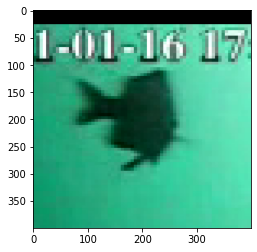

In [ ]:
plt.imshow(X_train[6])

In [ ]:
Y_train=np.array(train.drop(['file_name'],axis=1))
Y_train=Y_train[:8134] #Y_train=Y_train[:586]
Y_train.shape

(8134, 1)

In [ ]:
Y_test=np.array(test.drop(['file_name'],axis=1))
Y_test=Y_test[:1628]# Y_test=Y_test[:322
Y_test.shape

(1628, 1)

In [ ]:
print(X_train.shape)

(3873, 400, 400, 3)


In [ ]:
print(X_train.shape,'\n',X_test.shape,'\n',Y_train.shape,'\n',Y_test.shape)


(3128, 400, 400, 3) 
 (906, 400, 400, 3) 
 (3128, 1) 
 (906, 1)


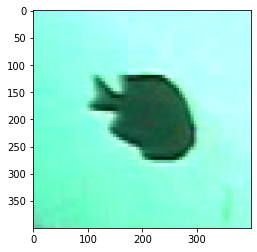

In [ ]:
plt.imshow(X_test[30])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
# Y_test=Y_test.reshape(-1,)

# Y_test[:5]
# Y_test.shape
Y_test.shape

(1628, 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier 


RNC = RandomForestClassifier()   # initialising KNeighbors Classifier
NB = GaussianNB()       

In [ ]:
train_x=X_train.reshape(X_train.shape[0],150*150*3)
test_x=X_test.reshape(X_test.shape[0],150*150*3)


In [ ]:
model_kNeighborsClassifier = RNC.fit(train_x, Y_train) # fitting Training Set
pred_RNC = model_kNeighborsClassifier.predict(test_x) # Predicting on test dataset


<ipython-input-27-330221197b6c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_kNeighborsClassifier = RNC.fit(train_x, Y_train) # fitting Training Set


In [ ]:
from sklearn.metrics import accuracy_score

acc_RNC = accuracy_score(Y_test, pred_RNC)  # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_RNC * 100)


accuracy score of KNeighbors Classifier is: 92.01474201474201


In [ ]:
model_NaiveBayes = NB.fit(train_x, Y_train)
pred_nb = model_NaiveBayes.predict(test_x)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
acc_nb = accuracy_score(Y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

Accuracy of Naive Bayes Classifier: 46.37592137592137


In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(estimators=[RNC, NB], final_estimator = lr,cv = 5,)

In [ ]:
# model_stack = clf_stack.fit(X_train, Y_train) # training of stacked model
# pred_stack = model_stack.predict(X_test)	 # predictions on test data using stacked model


In [ ]:
test_pred2=pd.DataFrame(pred_nb)
train_pred2=pd.DataFrame(pred_nb)


train_pred1=pd.DataFrame(pred_RNC)
test_pred1=pd.DataFrame(pred_RNC)



In [ ]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,Y_test)
model.score(df_test, Y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7604422604422605

In [ ]:
pred = model.predict(df_test) # Predicting on test dataset


In [ ]:
from sklearn.metrics import accuracy_score

acc_RNC = accuracy_score(Y_test, pred)  # evaluating accuracy score
print('accuracy score of RF and NB Classifier is:', acc_RNC * 100)

accuracy score of RF and NB Classifier is: 76.04422604422605


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

print("Classificaation Report: \n\n", classification_report(Y_test,pred))

Classificaation Report: 

               precision    recall  f1-score   support

           1       0.93      0.98      0.95       856
           2       0.00      0.00      0.00       106
           3       0.49      0.91      0.64       247
           4       0.65      0.42      0.51       157
           6       0.00      0.00      0.00        15
           7       0.78      0.83      0.80        75
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          13       1.00      0.21      0.35        33
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         1
          16       0.50      0.98      0.66        42
          17       0.00      0.00      0.00         9
          18       0.00      0.00      0.00        12
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
